<a href="https://colab.research.google.com/github/askolesov0608/CV_NV/blob/main/99CVLab2_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load and setup

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from google.colab import files

In [4]:
!cp /content/gdrive/MyDrive/CV/Lab2/visualPercepUtils.py /content #copy file

In [5]:
!cp -r /content/gdrive/MyDrive/CV/Lab2/ /content #copy all folder

In [6]:
from PIL import Image
from scipy.ndimage import filters
from scipy.signal import medfilt2d
import numpy as np
import matplotlib.pyplot as plt
import math as math
import os
import sys

import glob # Модуль для поиска файлов в директориях с помощью шаблонов в Unix стиле. Например, glob.glob('*.png')
import visualPercepUtils as vpu

In [7]:
#files.upload()

# Code provided from the teacher

In [8]:
# -----------------------
# Salt & pepper noise
# -----------------------

def addSPNoise(im, percent):
    # Now, im is a PIL image (not a NumPy array)
    # percent is in range 0-100 (%)

    # convert image it to numpy 2D array and flatten it
    im_np = np.array(im)
    im_shape = im_np.shape  # keep shape for later use (*)
    im_vec = im_np.flatten()  # this is a 1D array # https://www.geeksforgeeks.org/differences-flatten-ravel-numpy/

    # generate random locations
    N = im_vec.shape[0]  # number of pixels
    m = int(math.floor(percent * N / 100.0)) # number of pixels corresponding to the given percentage
    locs = np.random.randint(0, N, m)  # generate m random positions in the 1D array (index 0 to N-1)

    # generate m random S/P values (salt and pepper in the same proportion)
    s_or_p = np.random.randint(0, 2, m)  # 2 random values (0=salt and 1=pepper)

    # set the S/P values in the random locations
    im_vec[locs] = 255 * s_or_p  # values after the multiplication will be either 0 or 255

    # turn the 1D array into the original 2D image
    im2 = im_vec.reshape(im_shape) # (*) here is where we use the shape that we saved earlier

    # convert Numpy array im2 back to a PIL Image and return it
    return Image.fromarray(im2)

In [9]:
def testSandPNoise(im, percents):
    imgs = []
    for percent in percents:
        imgs.append(addSPNoise(im, percent))
    return imgs

In [10]:
# -----------------
# Gaussian noise
# -----------------

def addGaussianNoise(im, sd=5):
    return im + np.random.normal(loc=0, scale=sd, size=im.shape)

In [11]:
def testGaussianNoise(im, sigmas):
    imgs = []
    for sigma in sigmas:
        print('testing sigma:', sigma)
        imgs.append(addGaussianNoise(im, sigma))
        print(len(imgs))
    return imgs

In [12]:
# -------------------------
# Average (or mean) filter
# -------------------------

def averageFilter(im, filterSize):
    mask = np.ones((filterSize, filterSize)) # квадратную маску, заполненную единицами

    mask = np.divide(mask, np.sum(mask)) # can you think of any alternative for np.sum(mask)?
    #sum_mask = filterSize * filterSize

    #нормализуется (значения внутри = 1 ) путем деления на сумму всех элементов маски, чтобы получить среднее значение.
    # Это достигается путем деления маски на сумму всех ее элементов с помощью np.divide(mask, np.sum(mask))

    return filters.convolve(im, mask) #функция применяет созданную маску к изображению с помощью функции filters.convolve(im, mask)

In [13]:
def testAverageFilter(im_clean, params):
    imgs = []
    for sp_pctg in params['sp_pctg']:
        im_dirty = addSPNoise(im_clean, sp_pctg) # salt and pepper noise
        for filterSize in params['filterSizes']:
            imgs.append(np.array(im_dirty))
            imgs.append(averageFilter(im_dirty, filterSize))
    return imgs

In [14]:
# -----------------
# Gaussian filter
# -----------------

def gaussianFilter(im, sigma=5):
    # im is PIL image
    return filters.gaussian_filter(im, sigma)

In [15]:
def testGaussianFilter(im_clean, params):
    # This function turned out to be too similar to testAverageFilter
    # This is a good sign that code factorization is called for :)
    imgs = []
    for sigma in params['sd_gauss_noise']:
        im_dirty = addGaussianNoise(im_clean, sigma)
        for filterSize in params['sd_gauss_filter']:
            imgs.append(np.array(im_dirty))
            imgs.append(gaussianFilter(im_dirty, filterSize))
    return imgs

In [16]:
# -----------------
# Median filter
# -----------------

def medianFilter(im, filterSize):
    return medfilt2d(im, filterSize)

In [17]:
def testMedianFilter(im_clean, params):
    # This function turned out to be too similar to testAverageFilter
    # This is a good sign that code factorization is called for :)
    imgs = []
    for sp_pctg in params['sp_pctg']:
        im_dirty = addSPNoise(im_clean, sp_pctg)
        for filterSize in params['filterSizes']:
            imgs.append(np.array(im_dirty))
            imgs.append(medianFilter(im_dirty, filterSize))
    return imgs

In [18]:
#пути к директориям для входных и выходных файлов.
path_input = './Lab2/imgs-P2/'
path_output = './Lab2/imgs-out-P2/'

In [19]:
ls

gdrive/  Lab2/  __pycache__/  sample_data/  visualPercepUtils.py


In [20]:
# Получаем список файлов в директории
files = os.listdir(path_input)

# Выводим список файлов
for file in files:
    print(file)

girl.ppm
tree.ppm
toys.ppm
lena512.pgm
couple.ppm
lena256.pgm
peppers.ppm


In [21]:
bAllFiles = False
if bAllFiles:
    files = glob.glob(path_input + "*.pgm")
else:
    files = [path_input + 'lena256.pgm']  # lena256, lena512

# --------------------
# Tests to perform
# --------------------

testsNoises = ['testSandPNoise', 'testGaussianNoise']
testsFilters = ['testAverageFilter', 'testGaussianFilter', 'testMedianFilter']
bAllTests = True
if bAllTests:
    tests = testsNoises + testsFilters
else:
    tests = ['testSandPNoise']

# -------------------------------------------------------------------
# Dictionary of user-friendly names for each function ("test") name
# -------------------------------------------------------------------

nameTests = {'testGaussianNoise': 'Gaussian noise',
             'testSandPNoise': 'Salt & Pepper noise',
             'testAverageFilter': 'Mean filter',
             'testGaussianFilter': 'Gaussian filter',
             'testMedianFilter': 'Median filter'}

bSaveResultImgs = False

In [22]:
# -----------------------
# Parameters of noises
# -----------------------
percentagesSandP = [3]  # ratio (%) of image pixes affected by salt and pepper noise
gauss_sigmas_noise = [3, 5, 10]  # standard deviation (for the [0,255] range) for Gaussian noise

# -----------------------
# Parameters of filters
# -----------------------

gauss_sigmas_filter = [1.2]  # standard deviation for Gaussian filter
avgFilter_sizes = [3, 7, 15]  # sizes of mean (average) filter
medianFilter_sizes = [3, 7, 15]  # sizes of median filter

testsUsingPIL = ['testSandPNoise']  # which test(s) uses PIL images as input (instead of NumPy 2D arrays)


Testing on ['./Lab2/imgs-P2/lena256.pgm']
(256, 256)
1
2 None None


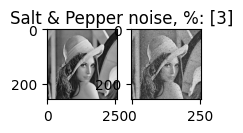

testing sigma: 3
1
testing sigma: 5
2
testing sigma: 10
3
num images 3
3
4 None None


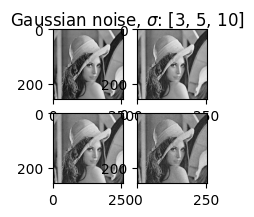

<ipython-input-12-614190999547>:14: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  return filters.convolve(im, mask) #функция применяет созданную маску к изображению с помощью функции filters.convolve(im, mask)


num images 6
6
7 None None


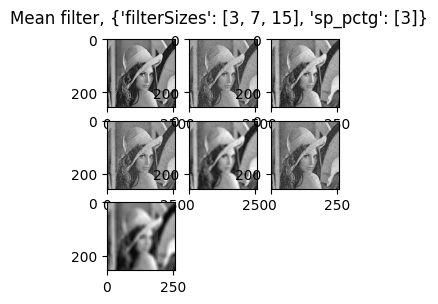

<ipython-input-14-c2da4ca38219>:7: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  return filters.gaussian_filter(im, sigma)


num images 6
6
7 None None


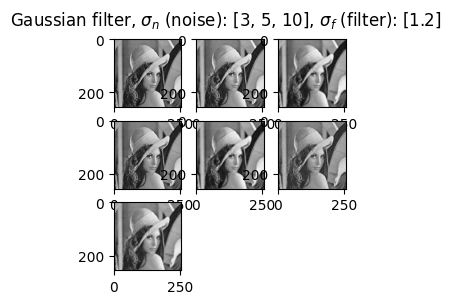

num images 6
6
7 None None


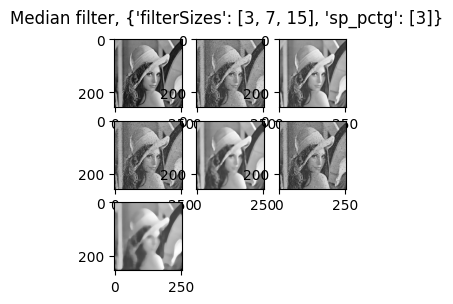

In [23]:
def doTests():
    print("Testing on", files)
    for imfile in files:
        im_pil = Image.open(imfile).convert('L')
        im = np.array(im_pil)  # from Image to array

        for test in tests:

            if test == "testGaussianNoise":
                params = gauss_sigmas_noise
                subTitle = r", $\sigma$: " + str(params)
            elif test == "testSandPNoise":
                params = percentagesSandP
                subTitle = ", %: " + str(params)
            elif test == "testAverageFilter":
                params = {}
                params['filterSizes'] = avgFilter_sizes
                params['sp_pctg'] = percentagesSandP
                subTitle = ", " + str(params)
            elif test == "testMedianFilter":
                params = {}
                params['filterSizes'] = avgFilter_sizes
                params['sp_pctg'] = percentagesSandP
                subTitle = ", " + str(params)
            elif test == "testGaussianFilter":
                params = {}
                params['sd_gauss_noise'] = gauss_sigmas_noise
                params['sd_gauss_filter'] = gauss_sigmas_filter
                subTitle = r", $\sigma_n$ (noise): " + str(gauss_sigmas_noise) + ", $\sigma_f$ (filter): " + str(gauss_sigmas_filter)
            if test in testsUsingPIL:
                outs_pil = eval(test)(im_pil, params)
                outs_np = vpu.pil2np(outs_pil)
            else:
                # apply test to given image and given parameters
                outs_np = eval(test)(im, params)
                print("num images", len(outs_np))
            print(len(outs_np))
            # display original image, noisy images and filtered images
            vpu.showInGrid([im] + outs_np, title=nameTests[test] + subTitle)

if __name__ == "__main__":
    doTests()

# Testing directory and loads

In [24]:
ls

gdrive/  Lab2/  __pycache__/  sample_data/  visualPercepUtils.py


In [25]:
folder_path = './Lab2/imgs-P2/'
path_output = './Lab2/imgs-out-P2/'


In [26]:
# Получаем список файлов в директории
files = os.listdir(folder_path)

# Выводим список файлов
for file in files:
    print(file)

girl.ppm
tree.ppm
toys.ppm
lena512.pgm
couple.ppm
lena256.pgm
peppers.ppm


In [27]:
filename = "lena512.pgm"

In [28]:
path_input = os.path.join(folder_path, filename)

In [29]:
test_image = Image.open(path_input)
print(test_image.size)

(512, 512)


array([[165, 165, 165, ..., 172, 158, 132],
       [165, 165, 165, ..., 172, 158, 132],
       [165, 165, 165, ..., 172, 158, 132],
       ...,
       [ 47,  47,  54, ..., 109, 105, 104],
       [ 48,  48,  58, ..., 108, 110, 113],
       [ 48,  48,  58, ..., 108, 110, 113]], dtype=uint8)
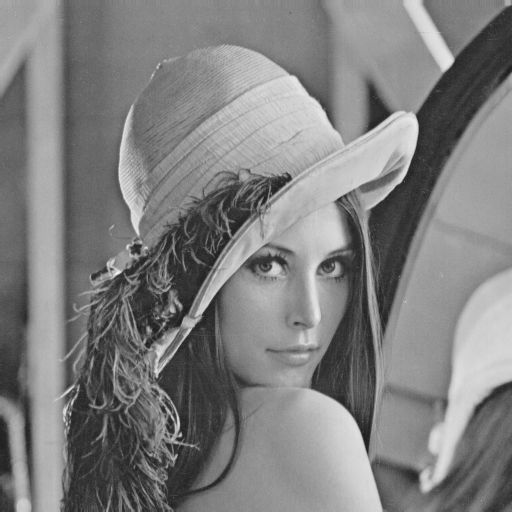

In [30]:
im = np.array(test_image.convert('L'))
im

# Ex Question 2 average Filter Step

### Form Vector function

In [30]:
#Create vector array (tenzor 1D) in row order and normalize it.
#After like in C we will miltipl image as np.array by rows then by column and summ the result
def normalize_horiz_array(filterSize):
    # Создаем вертикальный массив длиной filterSize, заполненный единицами
    horiz_array = np.ones((1, filterSize))

    # Нормализуем массив, разделив каждый элемент на сумму всех элементов
    normalized_array = horiz_array / np.sum(horiz_array)

    return normalized_array

### Normalize Vector function test

In [31]:
filterSize = 6

# Создаем вертикальный массив длиной filterSize, заполненный единицами
horiz_array = np.ones((1, filterSize))

# Нормализуем массив, разделив каждый элемент на сумму всех элементов
normalized_array = horiz_array / np.sum(horiz_array)

normalized_array

array([[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667]])

In [32]:
from scipy.signal import convolve2d
result = convolve2d(im, normalized_array, mode='same', boundary='symm')
result

array([[165.        , 164.83333333, 164.83333333, ..., 162.83333333,
        156.5       , 154.33333333],
       [165.        , 164.83333333, 164.83333333, ..., 162.83333333,
        156.5       , 154.33333333],
       [165.        , 164.83333333, 164.83333333, ..., 162.83333333,
        156.5       , 154.33333333],
       ...,
       [ 49.33333333,  48.83333333,  50.66666667, ..., 103.33333333,
        104.66666667, 105.33333333],
       [ 51.33333333,  50.83333333,  52.5       , ..., 107.83333333,
        109.66666667, 109.83333333],
       [ 51.33333333,  54.16666667,  55.83333333, ..., 107.83333333,
        109.66666667, 109.83333333]])

### Testing Vertical and Horizontal Pass in comparance with matrix

In [33]:
##Testing
# Пример использования функции
image = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])
# Горизонтальный вектор
horizontal_vector = np.array([[1, 1, 1]])
normalized_array = horizontal_vector / np.sum(horizontal_vector)

print("Vector hor \n", normalized_array)

result_horiz = convolve2d(image, normalized_array, mode='same', boundary='symm')
#result_horiz = result_horiz.astype(np.uint8)


print("Convolv_result_horiz \n", result_horiz)

vertical_normalized_array = normalized_array.T

print("Vector hor Transp", vertical_normalized_array)

result_total = convolve2d(result_horiz, vertical_normalized_array, mode='same', boundary='symm')
#result_total = result_total.astype(np.uint8)

print("result_total", result_total)
#plt.imshow(result_horiz, cmap='gray')



Vector hor 
 [[0.33333333 0.33333333 0.33333333]]
Convolv_result_horiz 
 [[1.33333333 2.         2.66666667]
 [4.33333333 5.         5.66666667]
 [7.33333333 8.         8.66666667]]
Vector hor Transp [[0.33333333]
 [0.33333333]
 [0.33333333]]
result_total [[2.33333333 3.         3.66666667]
 [4.33333333 5.         5.66666667]
 [6.33333333 7.         7.66666667]]


In [34]:
# in reason of real tusk we will transform the image matrix convov and return
# but here we will rotate the vector

In [35]:
filterSize = 3
mask = np.ones((filterSize, filterSize))
mask = np.divide(mask, np.sum(mask))
print(mask)
Res_teach = filters.convolve(image, mask)
print(image)

Res_teach

#plt.imshow(Res_teach, cmap='gray')

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


<ipython-input-35-9a08d3dbbdb4>:5: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  Res_teach = filters.convolve(image, mask)


array([[2, 2, 3],
       [4, 5, 5],
       [6, 7, 7]])

### Form the function VectorMeanFilter

In [36]:
def VectorMeanFilter(image, filterSize):

    normalized_array = normalize_horiz_array(filterSize)

    result_horiz = convolve2d(image, normalized_array, mode='same', boundary='symm')
    #result_horiz = result_horiz.astype(np.uint8)

    vertical_normalized_array = normalized_array.T

    result_total = convolve2d(result_horiz, vertical_normalized_array, mode='same', boundary='symm')
    #result_total = result_total.astype(np.uint8)

    #plt.imshow(result_horiz, cmap='gray')

    return result_total


In [37]:
import time

<ipython-input-11-614190999547>:14: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  return filters.convolve(im, mask) #функция применяет созданную маску к изображению с помощью функции filters.convolve(im, mask)


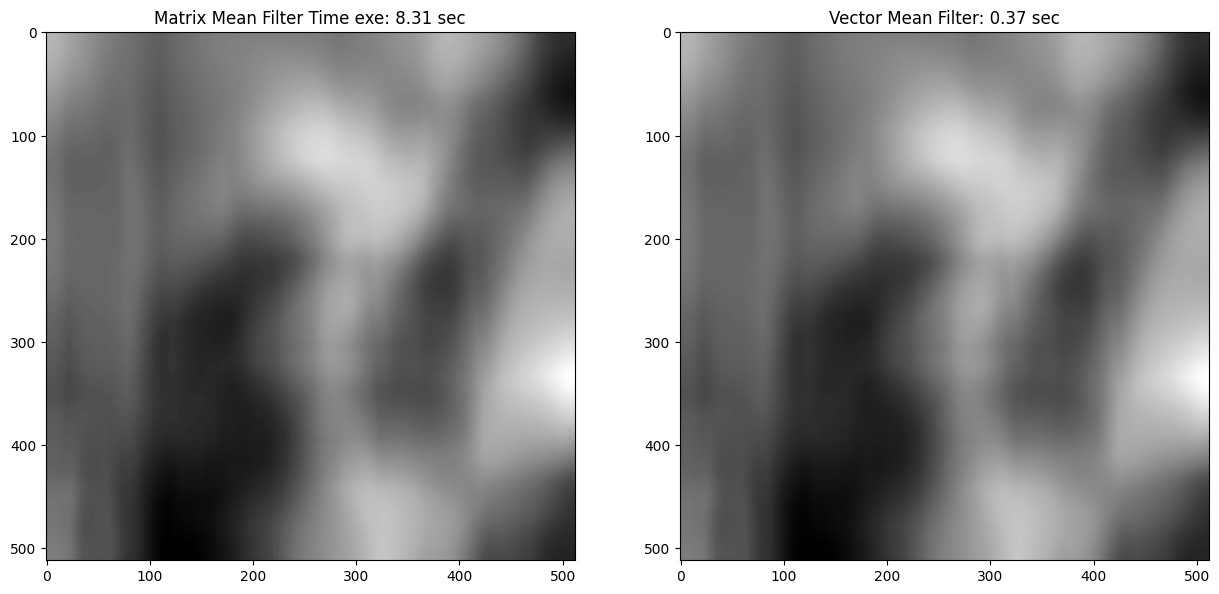

In [38]:

Fsize = 100

start_time = time.time()
Vector = VectorMeanFilter(im, Fsize)
end_time = time.time()
Vector_time = end_time - start_time


start_time = time.time()
Matrix = averageFilter(im, Fsize)
end_time = time.time()
Matrix_time = end_time - start_time

# Указываем размер изображений
plt.figure(figsize=(15, 15))  # Ширина: 15 дюймов, Высота: 15 дюймов

# Вывод результатов на экран в две колонки
plt.subplot(1, 2, 1)  # Первая колонка
plt.imshow(Matrix, cmap='gray')
plt.title(f'Matrix Mean Filter Time exe: {Matrix_time:.2f} sec')
#plt.axis('off')

plt.subplot(1, 2, 2)  # Вторая колонка
plt.imshow(Vector, cmap='gray')
plt.title(f'Vector Mean Filter: {Vector_time:.2f} sec')
#plt.axis('off')

plt.show()

<ipython-input-11-614190999547>:14: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  return filters.convolve(im, mask) #функция применяет созданную маску к изображению с помощью функции filters.convolve(im, mask)


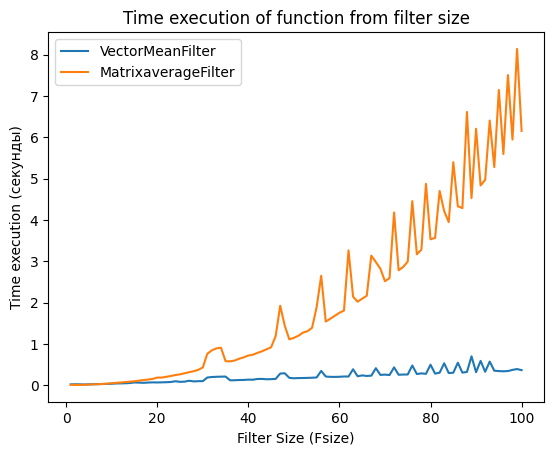

In [39]:
# Начальное и конечное значения для Fsize_range
start_Fsize = 1
end_Fsize = 100

# Списки для хранения времени выполнения
Vector_time_list = []
Matrix_time_list = []

for Fsize in range(start_Fsize, end_Fsize + 1):
    # Измеряем время выполнения VectorMeanFilter
    start_time = time.time()
    Vector = VectorMeanFilter(im, Fsize)
    end_time = time.time()
    Vector_time = end_time - start_time
    Vector_time_list.append(Vector_time)

    # Измеряем время выполнения averageFilter
    start_time = time.time()
    Matrix = averageFilter(im, Fsize)
    end_time = time.time()
    Matrix_time = end_time - start_time
    Matrix_time_list.append(Matrix_time)

# Построение графиков
plt.plot(range(start_Fsize, end_Fsize + 1), Vector_time_list, label='VectorMeanFilter')
plt.plot(range(start_Fsize, end_Fsize + 1), Matrix_time_list, label='MatrixaverageFilter')

plt.xlabel('Filter Size (Fsize)')
plt.ylabel('Time execution (секунды)')
plt.title('Time execution of function from filter size')
plt.legend()

plt.show()

# Ex Question 3 function gaussian

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal.windows import gaussian
from scipy.ndimage import gaussian_filter

## 3a gaussian of scipy.signal

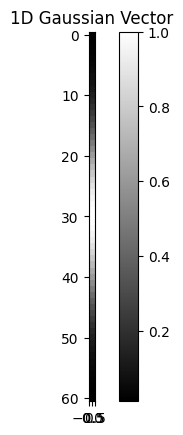

In [52]:
# Задаем размер и стандартное отклонение

sigma = 10 #standard deviation
n = sigma*6+1 #size

# Генерируем одномерный Гауссов массив
gv1d = gaussian(n, sigma).reshape(-1, 1)

# Отображаем gv1d как изображение без интерполяции
plt.imshow(gv1d, cmap='gray', interpolation='none')
plt.title('1D Gaussian Vector')
plt.colorbar()
plt.show()

## 3b Generate an n × n matrix

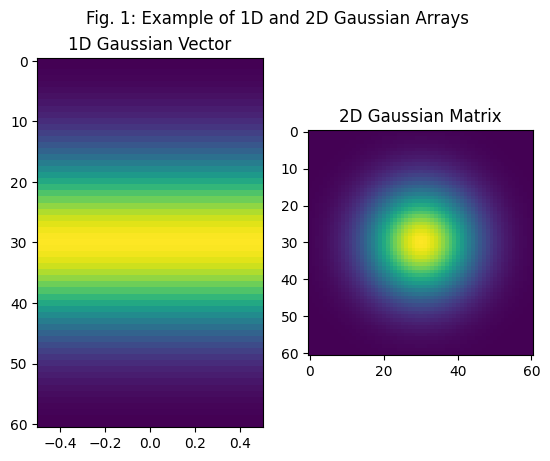

In [53]:
# Задаем размер и стандартное отклонение

sigma = 10
n = sigma*6+1


# Генерируем одномерный Гауссов массив
gv1d = gaussian(n, sigma)

# Создаем двумерный Гауссов массив путем умножения gv1d на его транспонированную версию
gv2d = np.outer(gv1d, gv1d)

# Отображаем gv1d как изображение без интерполяции
plt.subplot(1, 2, 1)
plt.imshow(gv1d.reshape(-1, 1), cmap='viridis', interpolation='none', aspect='auto')
plt.title('1D Gaussian Vector')
#plt.colorbar()

# Отображаем gv2d как изображение
plt.subplot(1, 2, 2)
plt.imshow(gv2d, cmap='viridis')
plt.title('2D Gaussian Matrix')
#plt.colorbar()

plt.suptitle('Fig. 1: Example of 1D and 2D Gaussian Arrays')
plt.show()


In [56]:
def GaussConvolv2D (image, sigma):

    n = sigma*6+1
    gv1d = gaussian(n, sigma)
    gv2d = np.outer(gv1d, gv1d)
    image = convolve2d(im, gv2d, mode='same', boundary='symm')
    return image

## 3c use gv2d as a mask

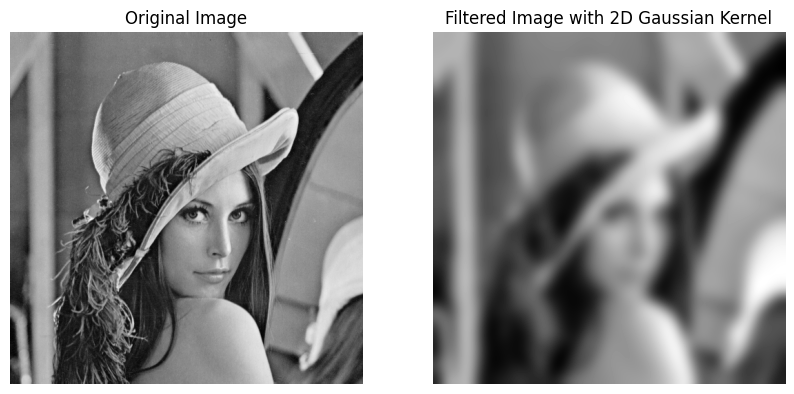

In [58]:
import numpy as np
from scipy.signal import convolve2d
# Convolve the image with gv2d
filtered_image = convolve2d(im, gv2d, mode='same', boundary='symm')

# Plot the original and filtered images for comparison
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(im, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image with 2D Gaussian Kernel')
plt.axis('off')

plt.show()

<ipython-input-14-c2da4ca38219>:7: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  return filters.gaussian_filter(im, sigma)


(-0.5, 511.5, 511.5, -0.5)

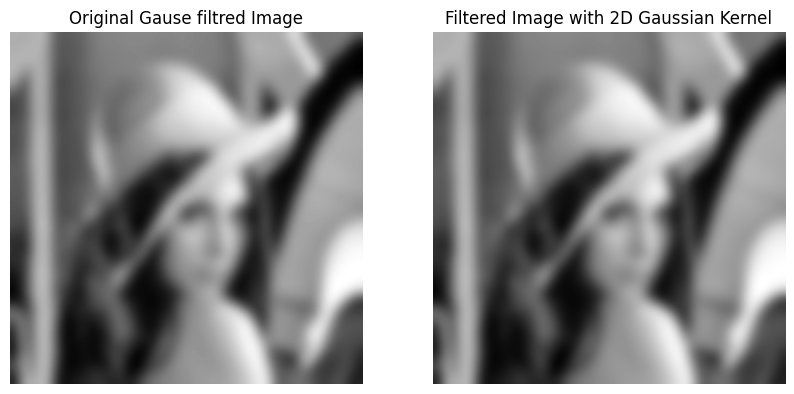

In [59]:
# Convolve the image with gv2d
filtered_image = convolve2d(im, gv2d, mode='same', boundary='symm')

#Original Gauss
Orig_gauss = gaussianFilter(im, sigma=10)

# Plot the original and filtered images for comparison
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(Orig_gauss, cmap='gray')
plt.title('Original Gause filtred Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image with 2D Gaussian Kernel')
plt.axis('off')


## 3e Gaussian filter is also separable

In [60]:
#Напишем функцию для гауса
# Задаем размер и стандартное отк:лонение
def GausinVector(sigma):
    n = sigma*6+1
# Генерируем одномерный Гауссов массив
    GV = gaussian(n, sigma).reshape(-1, 1)

    return GV


array([[0.011109  ],
       [0.01984109],
       [0.03404745],
       [0.05613476],
       [0.08892162],
       [0.13533528],
       [0.1978987 ],
       [0.2780373 ],
       [0.3753111 ],
       [0.48675226],
       [0.60653066],
       [0.72614904],
       [0.83527021],
       [0.92311635],
       [0.98019867],
       [1.        ],
       [0.98019867],
       [0.92311635],
       [0.83527021],
       [0.72614904],
       [0.60653066],
       [0.48675226],
       [0.3753111 ],
       [0.2780373 ],
       [0.1978987 ],
       [0.13533528],
       [0.08892162],
       [0.05613476],
       [0.03404745],
       [0.01984109],
       [0.011109  ]])

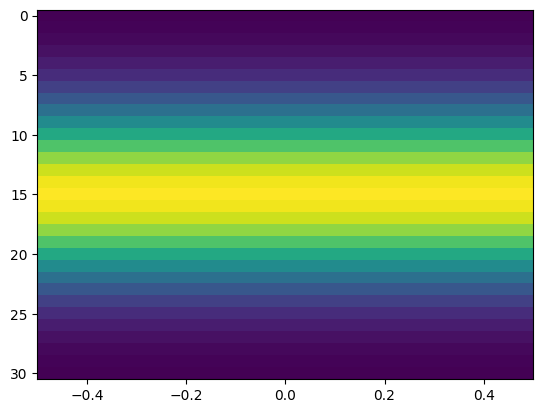

In [61]:
#Test
df = GausinVector(5)
plt.imshow(df.reshape(-1, 1), cmap='viridis', interpolation='none', aspect='auto')
df

In [77]:
#Multit Function
def GausinVectorFilter(image, sigma):

    normalized_array = GausinVector(sigma)

    result_vert = convolve2d(image, normalized_array, mode='same', boundary='symm')
    #result_horiz = result_horiz.astype(np.uint8)

    horiz_normalized_array = normalized_array.T

    result_total = convolve2d(result_vert, horiz_normalized_array, mode='same', boundary='symm')
    #result_total = result_total.astype(np.uint8)

    #plt.imshow(result_total, cmap='gray')

    return result_total


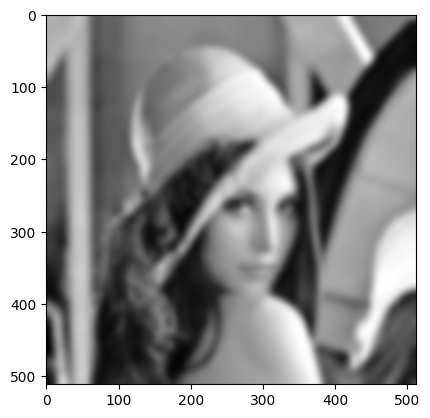

In [79]:
k = GausinVectorFilter(im, 5)
plt.imshow(k)

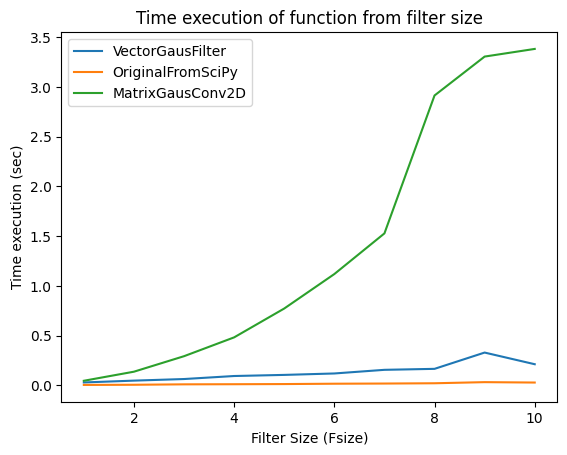

In [80]:
# Начальное и конечное значения для Fsize_range
import time
start_Sigma = 1
end_Sigma = 10

# Списки для хранения времени выполнения
GausVector_time_list = []
GausOriginal_time_list = []
GausConv2D_time_list = []

for Fsize in range(start_Sigma, end_Sigma + 1, 1):
    # Измеряем время выполнения VectorGaussinFilter
    start_time = time.time()
    Vector = GausinVectorFilter(im, Fsize)
    end_time = time.time()
    Vector_time = end_time - start_time
    GausVector_time_list.append(Vector_time)

    # Измеряем время выполнения OriginalFromSciPyFilter
    start_time = time.time()
    Original = gaussian_filter(im, sigma=Fsize)
    end_time = time.time()
    Original_time = end_time - start_time
    GausOriginal_time_list.append(Original_time)

    # Измеряем время выполнения MatrixGausConv2D
    start_time = time.time()
    Matrix = GaussConvolv2D(im, sigma=Fsize)
    end_time = time.time()
    Matrix_time = end_time - start_time
    GausConv2D_time_list.append(Matrix_time)

# Построение графиков
plt.plot(range(start_Sigma, end_Sigma + 1), GausVector_time_list, label='VectorGausFilter')
plt.plot(range(start_Sigma, end_Sigma + 1), GausOriginal_time_list, label='OriginalFromSciPy')
plt.plot(range(start_Sigma, end_Sigma + 1), GausConv2D_time_list, label='MatrixGausConv2D')


plt.xlabel('Filter Size (Fsize)')
plt.ylabel('Time execution (sec)')
plt.title('Time execution of function from filter size')
plt.legend()

plt.show()

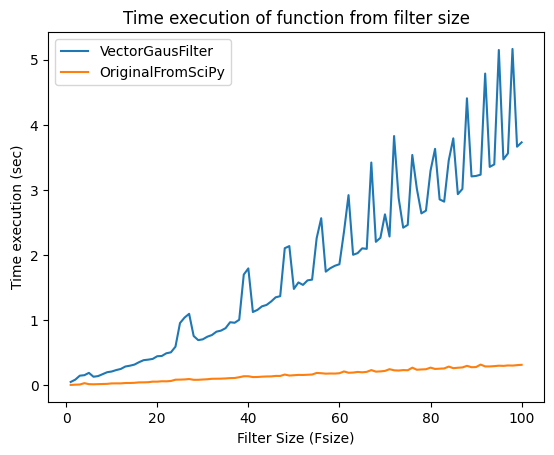

In [81]:
# Начальное и конечное значения для Fsize_range
import time
start_Sigma = 1
end_Sigma = 100

# Списки для хранения времени выполнения
GausVector_time_list = []
GausOriginal_time_list = []
GausConv2D_time_list = []

for Fsize in range(start_Sigma, end_Sigma + 1, 1):
    # Измеряем время выполнения VectorGaussinFilter
    start_time = time.time()
    Vector = GausinVectorFilter(im, Fsize)
    end_time = time.time()
    Vector_time = end_time - start_time
    GausVector_time_list.append(Vector_time)

    # Измеряем время выполнения OriginalFromSciPyFilter
    start_time = time.time()
    Original = gaussian_filter(im, sigma=Fsize)
    end_time = time.time()
    Original_time = end_time - start_time
    GausOriginal_time_list.append(Original_time)


# Построение графиков
plt.plot(range(start_Sigma, end_Sigma + 1), GausVector_time_list, label='VectorGausFilter')
plt.plot(range(start_Sigma, end_Sigma + 1), GausOriginal_time_list, label='OriginalFromSciPy')



plt.xlabel('Filter Size (Fsize)')
plt.ylabel('Time execution (sec)')
plt.title('Time execution of function from filter size')
plt.legend()

plt.show()

## Lets be the faster in C+ or in Cyton

In [84]:
#Шаг 1: Импорт необходимых библиотек
import numpy as np
from scipy.signal import convolve2d
import time
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt


In [85]:
#Шаг 2: Определение функции Гауссова фильтра
def GausinVector(sigma):
    """ Генерация одномерного Гауссова фильтра """
    # размер фильтра
    size = int(sigma * 3)
    x = np.arange(-size, size + 1)
    gaus_vector = np.exp(-(x**2 / (2 * sigma**2)))
    gaus_vector /= gaus_vector.sum()
    return gaus_vector.reshape((1, -1))

def GausinVectorFilter(image, sigma):
    normalized_array = GausinVector(sigma)

    result_vert = convolve2d(image, normalized_array, mode='same', boundary='symm')
    horiz_normalized_array = normalized_array.T

    result_total = convolve2d(result_vert, horiz_normalized_array, mode='same', boundary='symm')

    return result_total

In [89]:
#Шаг 3: Распараллеливание обработки
def process_image_segment(segment, sigma):
    """ Обработка отдельного сегмента изображения """
    return GausinVectorFilter(segment, sigma)

def parallel_gaussian_filter(image, start_sigma, end_sigma):
    GausVector_time_list = []
    num_workers = 16  # Количество потоков, можно настроить в зависимости от количества ядер процессора
    segments = np.array_split(image, num_workers)  # Разбиение изображения на подматрицы

    for Fsize in range(start_sigma, end_sigma + 1):
        start_time = time.time()

        with ThreadPoolExecutor(max_workers=num_workers) as executor:
            results = list(executor.map(lambda segment: process_image_segment(segment, Fsize), segments))

        # Собираем обработанные сегменты обратно в одно изображение
        full_result = np.vstack(results)

        end_time = time.time()
        Vector_time = end_time - start_time
        GausVector_time_list.append(Vector_time)

        # Отображение результата
        plt.imshow(full_result, cmap='gray')
        plt.title(f"Filtered Image with sigma={Fsize}")
        plt.show()

    return GausVector_time_list


In [92]:
def parallel_gaussian_filter(image, start_sigma, end_sigma):
    GausVector_time_list = []
    num_workers = 16  # Количество потоков, можно настроить в зависимости от количества ядер процессора
    segments = np.array_split(image, num_workers)  # Разбиение изображения на подматрицы

    for Fsize in range(start_sigma, end_sigma + 1):
        start_time = time.time()

        with ThreadPoolExecutor(max_workers=num_workers) as executor:
            results = list(executor.map(lambda segment: process_image_segment(segment, Fsize), segments))

        # Собираем обработанные сегменты обратно в одно изображение
        full_result = np.vstack(results)

        end_time = time.time()
        Vector_time = end_time - start_time
        GausVector_time_list.append(Vector_time)

        # Отображение результата
        #plt.imshow(full_result, cmap='gray')
        #plt.title(f"Filtered Image with sigma={Fsize}")
        #plt.show()

    return GausVector_time_list

In [94]:
#Шаг 4: Тестирования функции
# Загрузка изображения
#image = np.random.rand(1024, 1024)  # Пример: случайное изображение для демонстрации

image = im
# Параметры фильтра
start_sigma = 1
end_sigma = 100

# Выполнение параллельной фильтрации
time_stats = parallel_gaussian_filter(image, start_sigma, end_sigma)
print(time_stats)



[0.0755012035369873, 0.11779665946960449, 0.1383647918701172, 0.21579813957214355, 0.24421238899230957, 0.3092539310455322, 0.36313343048095703, 0.42851734161376953, 0.2739548683166504, 0.3080589771270752, 0.35527658462524414, 0.38863444328308105, 0.42774271965026855, 0.46672844886779785, 0.5230197906494141, 0.5472934246063232, 0.9455788135528564, 1.037454605102539, 1.1139812469482422, 1.013655662536621, 0.7545030117034912, 0.8027548789978027, 0.848557710647583, 0.8854062557220459, 0.9303591251373291, 0.9676685333251953, 1.9549810886383057, 1.0483911037445068, 1.0903055667877197, 1.4937715530395508, 1.9068224430084229, 1.5983688831329346, 1.244675874710083, 1.2925474643707275, 1.3571231365203857, 1.3876242637634277, 1.4265973567962646, 1.5076074600219727, 1.7485406398773193, 2.490399122238159, 2.554581880569458, 2.4113008975982666, 1.6656031608581543, 1.7235889434814453, 2.3633487224578857, 4.183824777603149, 1.906111240386963, 1.8799242973327637, 1.9569077491760254, 2.3298730850219727

In [96]:
GausOriginal_time_list

[]

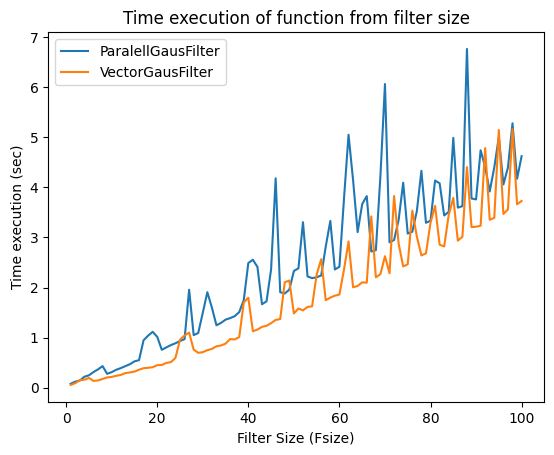

In [102]:
plt.plot(range(start_Sigma, end_Sigma + 1), time_stats, label='ParalellGausFilter')
plt.plot(range(start_Sigma, end_Sigma + 1), GausVector_time_list, label='VectorGausFilter')



plt.xlabel('Filter Size (Fsize)')
plt.ylabel('Time execution (sec)')
plt.title('Time execution of function from filter size')
plt.legend()

plt.show()

#No parallel in GoogleColab

# Ex Question 4 GaussianNoise for ifor gray-level and color images.

In [37]:
# Получаем список файлов в директории
files = os.listdir(folder_path)

# Выводим список файлов
for file in files:
    print(file)

girl.ppm
tree.ppm
toys.ppm
lena512.pgm
couple.ppm
lena256.pgm
peppers.ppm


In [57]:
filename1 = "peppers.ppm"
path_input = os.path.join(folder_path, filename1)

In [58]:
im2 = Image.open(path_input)
print(im.size)

262144


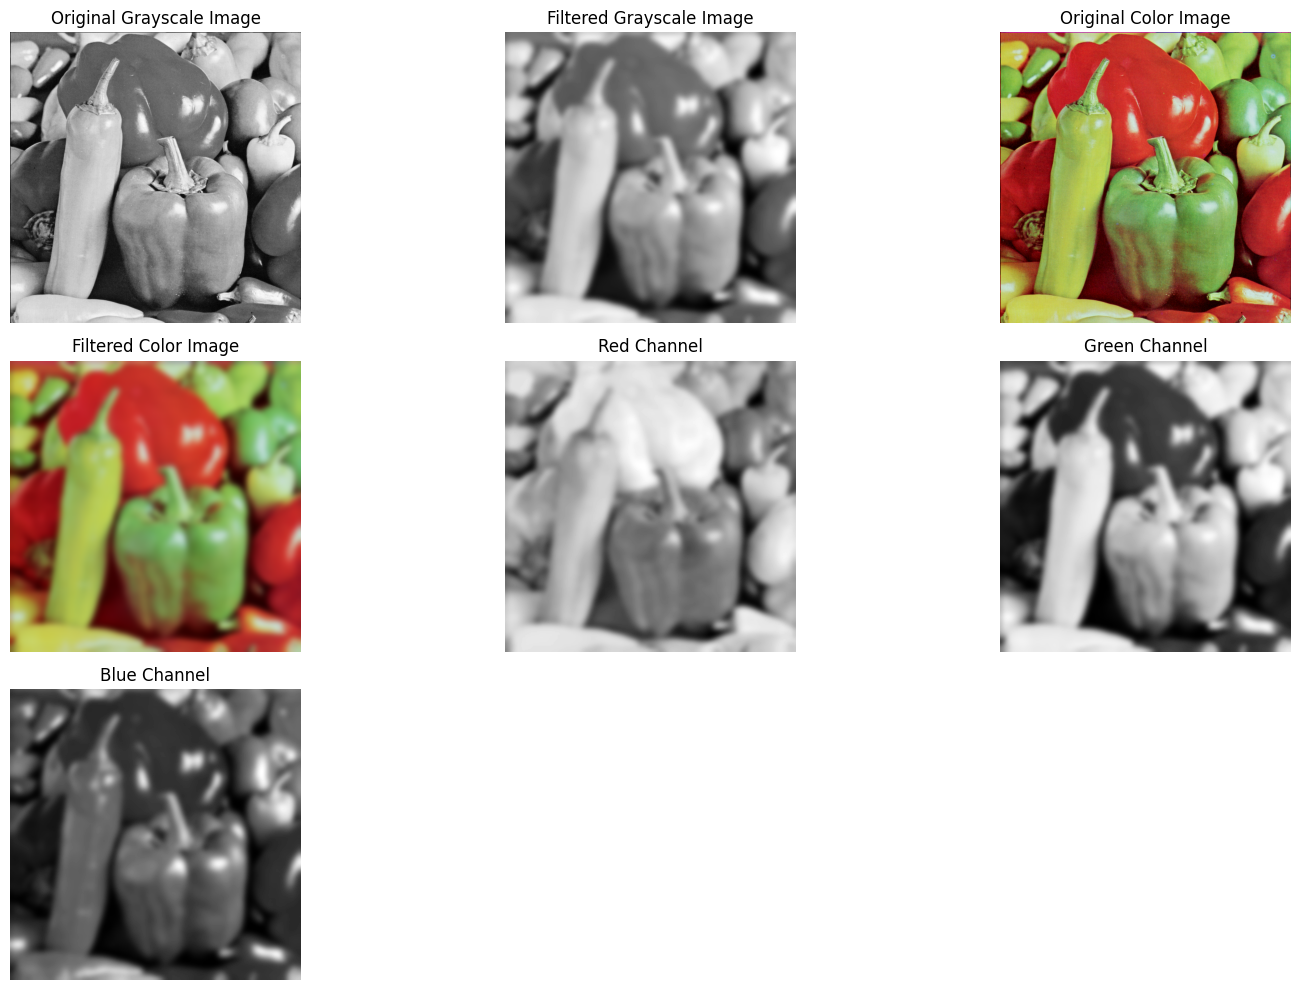

In [64]:
from skimage.io import imread

grayscale_image = im2.convert("L")
color_image = im2

sigma = 5

# Преобразование изображения в массив numpy
color_image_array = np.array(color_image)

filtered_gray = gaussian_filter(grayscale_image, sigma=sigma)

filtered_color = np.zeros_like(color_image, dtype=np.float64)
filtered_color_channels = []

# Применяем фильтр Гаусса к каждому каналу
filtered_color = np.zeros_like(color_image_array)
for channel in range(3):  # Предполагая, что у  есть RGB каналы
    filtered_channel = gaussian_filter(color_image_array[:, :, channel], sigma=sigma)
    filtered_color_channels.append(filtered_channel)
    filtered_color[:, :, channel] = filtered_channel

# Вывод изображений
plt.figure(figsize=(15, 10))

# Исходное grayscale изображение
plt.subplot(3, 3, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Фильтрованное grayscale изображение
plt.subplot(3, 3, 2)
plt.imshow(filtered_gray, cmap='gray')
plt.title('Filtered Grayscale Image')
plt.axis('off')

# Исходное RGB изображение
plt.subplot(3, 3, 3)
plt.imshow(color_image)
plt.title('Original Color Image')
plt.axis('off')

# Фильтрованное RGB изображение
plt.subplot(3, 3, 4)
plt.imshow(filtered_color.astype(np.uint8))
plt.title('Filtered Color Image')
plt.axis('off')

# Вывод каждого канала RGB после фильтра на печать
for i, channel_name in enumerate(['Red Channel', 'Green Channel', 'Blue Channel']):
    plt.subplot(3, 3, i + 5)
    plt.imshow(filtered_color_channels[i], cmap='gray')
    plt.title(channel_name)
    plt.axis('off')

plt.tight_layout()
plt.show()

#Ex Question 4 quotient image

Quotient image - это изображение, полученное путем пиксельного деления другого изображения на пиксели. C[i, j] = A[i, j] / B[i, j]

In [88]:
def quotientImage(im, sigma):
    # Применяем размытие Гаусса к исходному изображению
    blurred_im = gaussian_filter(im, sigma=sigma)

    # Вычисляем квотиентное изображение путем деления исходного на размытое
    quotient_im = np.divide(im, blurred_im)
    #numpy.divide(x1, x2, out=None, where=True, casting='same_kind', **kwargs)

    return quotient_im


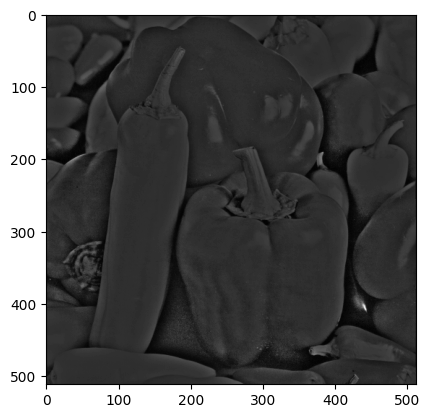

In [94]:
TestQuot = quotientImage(grayscale_image, 10)
plt.imshow(TestQuot)

#Ex Question 6 Greek letters and math symbols

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"]
})

# Ваши данные для построения графика
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

# Строим график
plt.plot(x, y)

# Добавляем надписи с использованием LaTeX
plt.xlabel(r'$\mathrm{Время\ (с)}$')  # Надпись оси X
plt.ylabel(r'$\mathrm{Скорость\ (м/с)}$')  # Надпись оси Y
plt.title(r'$\mathrm{График\ зависимости\ скорости\ от\ времени}$')  # Заголовок

# Отображаем график
plt.show()


#Ex Question 7 to zoom in on an area

In [39]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import ipywidgets as widgets
from ipywidgets import interact

#to upload it to your Colab workspace first)

filename1 = "peppers.ppm"
path_input = os.path.join(folder_path, filename1)
im2 = Image.open(path_input)

img = im2

# Function to display the image with the zoomed area
def view_image(x, y, zoom):
    fig, ax = plt.subplots()
    ax.imshow(img)

    # Set the zoom box properties
    zoom_size = zoom
    rect = patches.Rectangle((x, y), zoom_size, zoom_size, linewidth=1, edgecolor='r', facecolor='none')

    # Add the rectangle to the plot
    ax.add_patch(rect)
    plt.show()

    # Display the zoomed part
    fig, ax = plt.subplots()
    ax.imshow(img.crop((x, y, x + zoom_size, y + zoom_size)))
    plt.show()

# Interactive widgets
x = widgets.IntSlider(min=0, max=img.width - 100, step=1, value=50, description='X Coordinate:')
y = widgets.IntSlider(min=0, max=img.height - 100, step=1, value=50, description='Y Coordinate:')
zoom = widgets.IntSlider(min=10, max=200, step=1, value=100, description='Zoom Box Size:')

# Display the interactive plot
interact(view_image, x=x, y=y, zoom=zoom)

interactive(children=(IntSlider(value=50, description='X Coordinate:', max=412), IntSlider(value=50, descripti…

<function __main__.view_image(x, y, zoom)>

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import ipywidgets as widgets
from ipywidgets import interact

color_image = im2
img_array = np.array(color_image)
#img_array = np.random.rand(200, 200)   Пример: случайное изображение для теста

# Функция для отображения изображения и зума
def view_image(x, y, zoom):
    fig, ax = plt.subplots()
    ax.imshow(img_array, cmap='gray')  # Убедитесь, что используете правильную цветовую карту

    # Установка свойств рамки зума
    zoom_size = zoom
    rect = patches.Rectangle((x, y), zoom_size, zoom_size, linewidth=1, edgecolor='r', facecolor='none')

    # Добавление прямоугольника на график
    ax.add_patch(rect)
    plt.show()

    # Отображение увеличенной части
    fig, ax = plt.subplots()
    zoomed_img = img_array[y:y+zoom_size, x:x+zoom_size]
    ax.imshow(zoomed_img, cmap='gray')
    plt.show()

# Интерактивные виджеты для управления параметрами
x = widgets.IntSlider(min=0, max=img_array.shape[1] - 10, step=1, value=50, description='X Coordinate:')
y = widgets.IntSlider(min=0, max=img_array.shape[0] - 10, step=1, value=50, description='Y Coordinate:')
zoom = widgets.IntSlider(min=10, max=min(img_array.shape[0], img_array.shape[1]), step=1, value=50, description='Zoom Box Size:')

# Отображение интерактивного графика
interact(view_image, x=x, y=y, zoom=zoom)

interactive(children=(IntSlider(value=50, description='X Coordinate:', max=502), IntSlider(value=50, descripti…

<function __main__.view_image(x, y, zoom)>

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import ipywidgets as widgets
from ipywidgets import interact

# Предположим, что img_array - это ваше изображение в виде np.array
# Например, img_array = np.random.rand(200, 200) # случайное изображение
#img_array = np.random.rand(200, 200)  # Пример: случайное изображение для демонстрации
color_image = im2
img_array = np.array(color_image)

# Функция для отображения изображения и зума
def view_image(x, y, zoom, scale):
    # Применяем масштаб к размеру фигуры
    fig_scale_width = 6 * scale
    fig_scale_height = 3 * scale
    fig, ax = plt.subplots(figsize=(fig_scale_width, fig_scale_height))
    ax.imshow(img_array, cmap=None)  # Используйте правильную цветовую карту

    # Установка свойств рамки зума
    zoom_size = zoom
    rect = patches.Rectangle((x, y), zoom_size, zoom_size, linewidth=1, edgecolor='r', facecolor='none')

    # Добавление прямоугольника на график
    ax.add_patch(rect)
    plt.show()

    # Отображение увеличенной части с адаптивным размером фигуры
    zoom_fig_width = 4 * scale
    zoom_fig_height = 4 * scale
    fig, ax = plt.subplots(figsize=(zoom_fig_width, zoom_fig_height))
    zoomed_img = img_array[y:y+zoom_size, x:x+zoom_size]
    ax.imshow(zoomed_img, cmap=None)
    plt.show()

# Интерактивные виджеты для управления параметрами
x = widgets.IntSlider(min=0, max=img_array.shape[1] - 10, step=1, value=50, description='X Coordinate:')
y = widgets.IntSlider(min=0, max=img_array.shape[0] - 10, step=1, value=50, description='Y Coordinate:')
zoom = widgets.IntSlider(min=10, max=min(img_array.shape[0], img_array.shape[1]), step=1, value=50, description='Zoom Box Size:')
scale = widgets.FloatSlider(min=0.5, max=3.0, step=0.1, value=1.0, description='Image Scale:')

# Отображение интерактивного графика
interact(view_image, x=x, y=y, zoom=zoom, scale=scale)


interactive(children=(IntSlider(value=50, description='X Coordinate:', max=502), IntSlider(value=50, descripti…

<function __main__.view_image(x, y, zoom, scale)>